In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

RANDOM_SEED = 42

for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../data/WISDM_ar_v1.1_raw.txt


In [2]:
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('../data/WISDM_ar_v1.1_raw.txt', header = None, names = columns)\

In [3]:
df = df.dropna()
df['z-axis'] = df['z-axis'].str.replace(';', '')
df['z-axis'] = df['z-axis'].astype(float)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
user         1098203 non-null int64
activity     1098203 non-null object
timestamp    1098203 non-null int64
x-axis       1098203 non-null float64
y-axis       1098203 non-null float64
z-axis       1098203 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.7+ MB


,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [5]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:200]
    axis = data["x-axis"].plot(subplots=True, 
                     title=activity,color="b")
    axis = data["y-axis"].plot(subplots=True, 
                 title=activity,color="r")
    axis = data["z-axis"].plot(subplots=True, 
             title=activity,color="g")
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

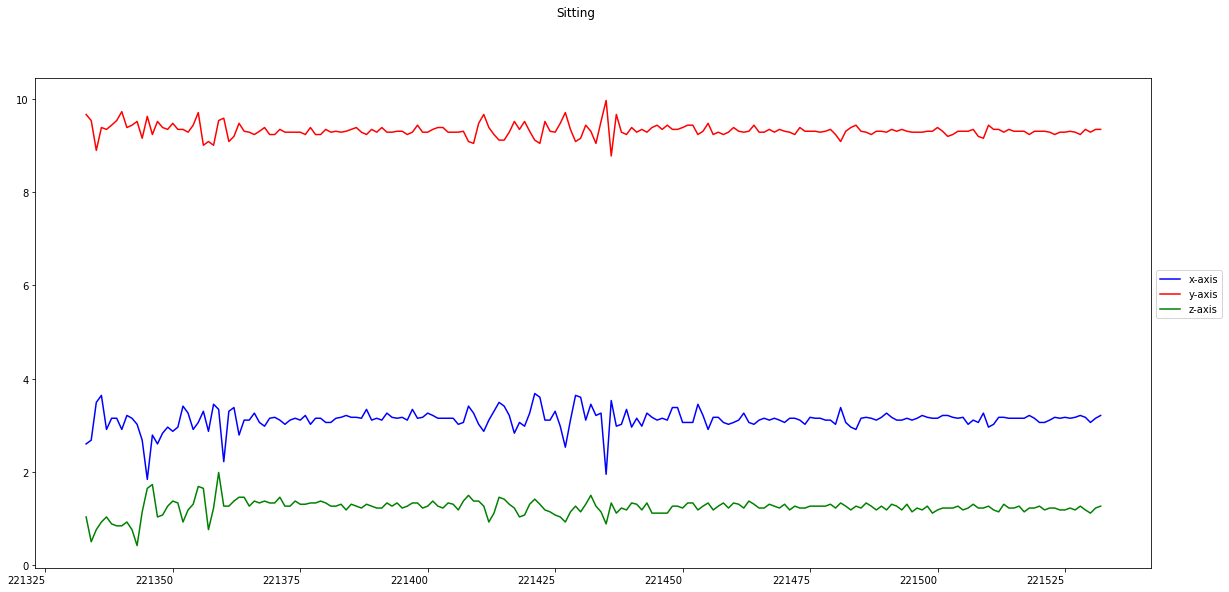

In [6]:
plot_activity("Sitting", df)

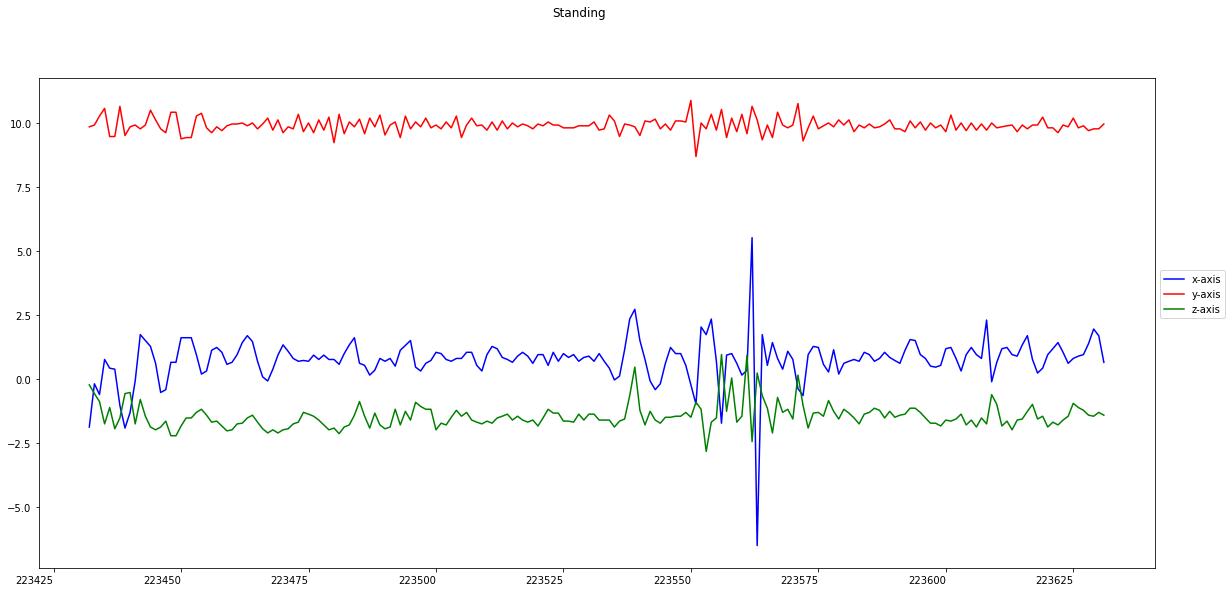

In [7]:
plot_activity("Standing", df)


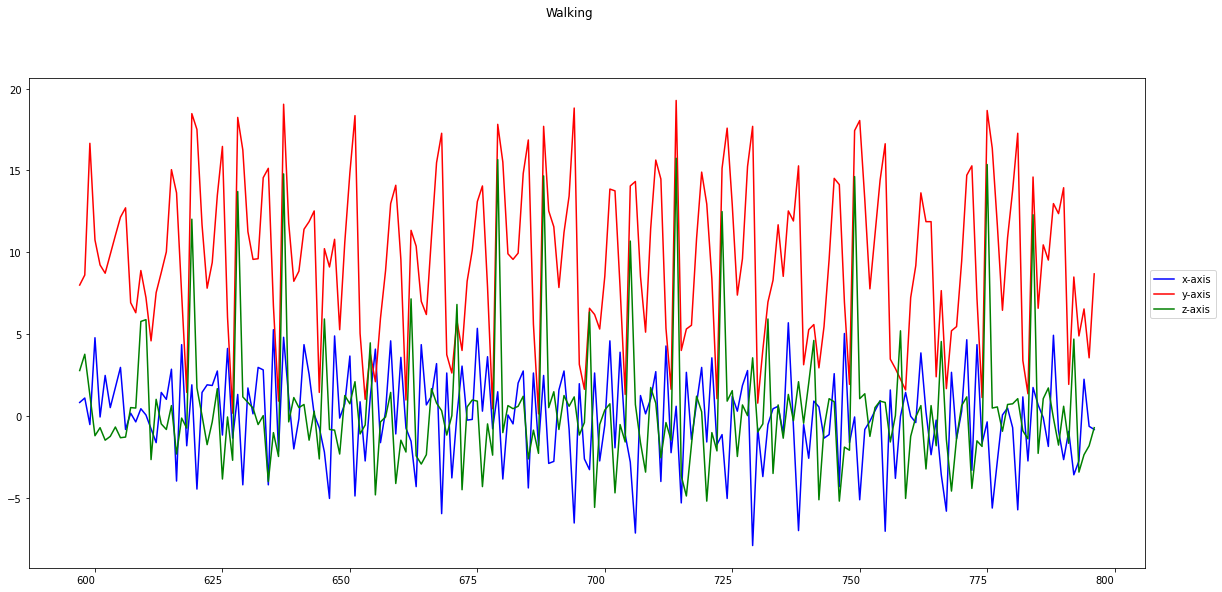

In [8]:
plot_activity("Walking", df)


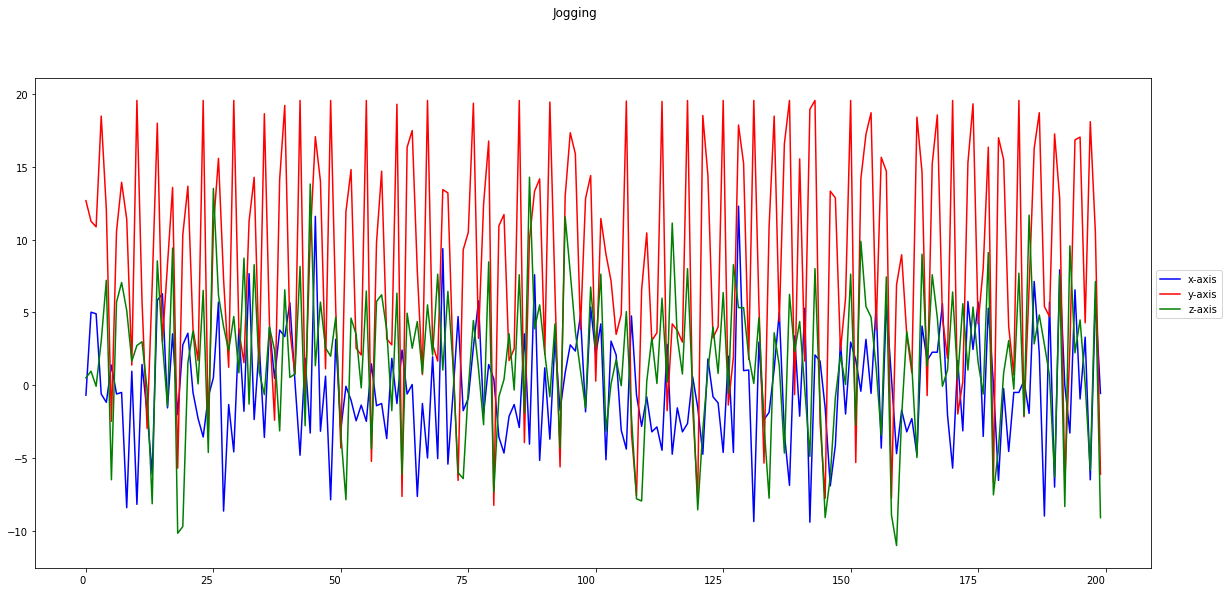

In [9]:
plot_activity("Jogging", df)


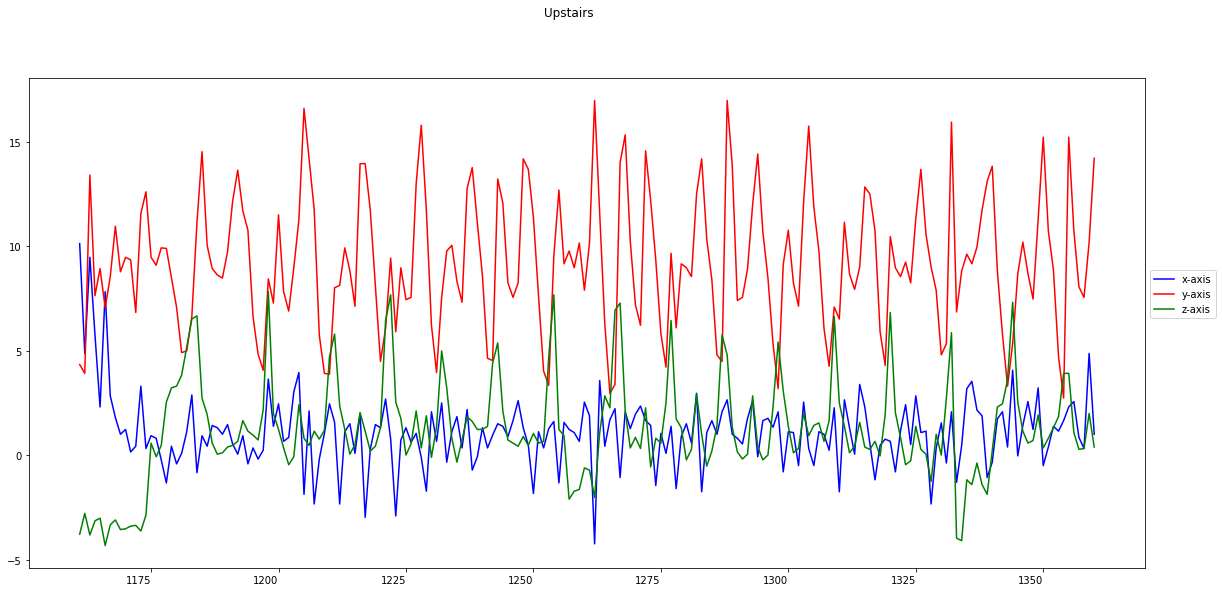

In [10]:
plot_activity("Upstairs", df)


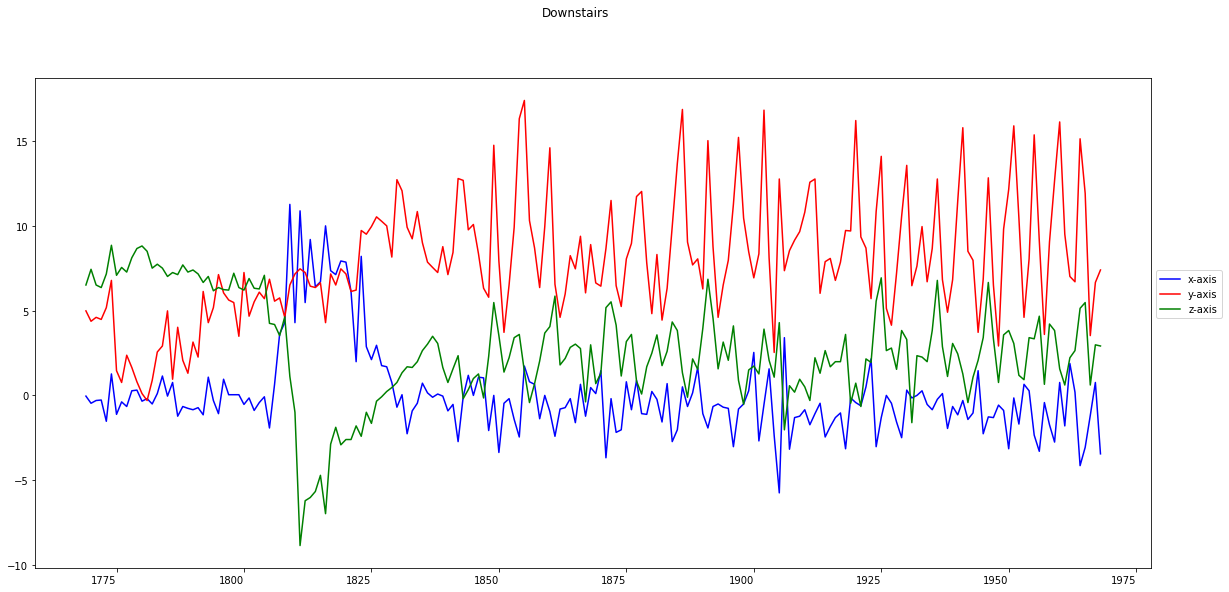

In [11]:
plot_activity("Downstairs", df)


In [12]:
df.to_csv('../data/wisdm.csv')